In [44]:
# librerias para manejo de datos
import scipy
import random
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('avila-tr.csv')
test = pd.read_csv('avila-ts.csv')

In [3]:
train.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   intercolumnar_distance             10430 non-null  float64
 1   upper_margin                       10430 non-null  float64
 2   lower_margin                       10430 non-null  float64
 3   exploitation                       10430 non-null  float64
 4   row_number                         10430 non-null  float64
 5   modular_ratio                      10430 non-null  float64
 6   interlinear_spacing                10430 non-null  float64
 7   weight                             10430 non-null  float64
 8   peak_number                        10430 non-null  float64
 9   modular_ratio_interlinear_spacing  10430 non-null  float64
 10  class                              10430 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.5+ KB


In [5]:
train.describe()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.005739,0.006370,0.013973,-0.062495,0.061949,0.012914,-0.123985
std,0.991431,3.920868,1.120202,1.020094,0.992053,1.126245,7.084818,12.664409,1.087665,13.445886
min,-3.498799,-2.426761,-3.210528,-7.000000,-4.922215,-7.450257,-711.000000,-463.000000,-5.486218,-1069.000000
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.543569,-0.372457,-0.516428
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.656880,0.500624,0.531406
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,625.000000,44.000000,522.000000


In [6]:
test.isnull().sum()

intercolumnar_distance               0
upper_margin                         0
lower_margin                         0
exploitation                         0
row_number                           0
modular_ratio                        0
interlinear_spacing                  0
weight                               0
peak_number                          0
modular_ratio_interlinear_spacing    0
class                                0
dtype: int64

In [7]:
test.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   intercolumnar_distance             10437 non-null  float64
 1   upper_margin                       10437 non-null  float64
 2   lower_margin                       10437 non-null  float64
 3   exploitation                       10437 non-null  float64
 4   row_number                         10437 non-null  float64
 5   modular_ratio                      10437 non-null  float64
 6   interlinear_spacing                10437 non-null  float64
 7   weight                             10437 non-null  float64
 8   peak_number                        10437 non-null  float64
 9   modular_ratio_interlinear_spacing  10437 non-null  float64
 10  class                              10437 non-null  object 
dtypes: float64(10), object(1)
memory usage: 897.1+ KB


In [9]:
test.describe()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,-0.003414,-0.006365,-0.008886,0.002350,0.191704,-0.008691,0.685709
std,1.008551,0.955257,0.992430,1.012527,1.007876,1.000360,0.966827,37.412249,1.001240,41.688912
min,-3.498799,-2.426761,-3.210528,-7.000000,-4.922215,-7.450257,-11.935457,-1375.000000,-4.737863,-587.000000
25%,-0.128929,-0.259834,0.064919,-0.527256,0.172340,-0.598658,-0.044076,-0.551204,-0.372457,-0.515079
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.640281,0.500624,0.526304
max,11.819916,19.470188,7.458681,3.987152,1.066121,12.315569,4.901228,2089.000000,3.213413,3034.000000


In [10]:
train['class'].value_counts(normalize=True)

class
A    0.410930
F    0.188015
E    0.104986
I    0.079674
X    0.050048
H    0.049760
G    0.042761
D    0.033749
Y    0.025503
C    0.009875
W    0.004219
B    0.000479
Name: proportion, dtype: float64

In [11]:
test['class'].value_counts(normalize=True)

class
A    0.410654
F    0.187985
E    0.104915
I    0.079716
X    0.050014
H    0.049823
G    0.042828
D    0.033822
Y    0.025582
C    0.009869
W    0.004312
B    0.000479
Name: proportion, dtype: float64

In [12]:
train.corr(numeric_only=True)

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular_ratio_interlinear_spacing
intercolumnar_distance,1.000000,-0.037577,0.034473,-0.052995,0.451966,-0.044663,0.002956,-0.001249,0.059427,-0.005668
upper_margin,-0.037577,1.000000,0.414578,0.001716,-0.067759,0.424384,0.107299,0.003049,0.349011,-0.001648
lower_margin,0.034473,0.414578,1.000000,0.151398,0.011333,0.132723,0.051167,0.002244,0.193194,-0.017854
exploitation,-0.052995,0.001716,0.151398,1.000000,0.111660,0.252882,0.026307,0.033411,0.283756,0.047837
row_number,0.451966,-0.067759,0.011333,0.111660,1.000000,0.039824,0.013689,-0.001106,0.274883,0.009772
modular_ratio,-0.044663,0.424384,0.132723,0.252882,0.039824,1.000000,0.107955,-0.009616,0.214207,0.070395
interlinear_spacing,0.002956,0.107299,0.051167,0.026307,0.013689,0.107955,1.000000,0.000841,0.052826,0.004771
weight,-0.001249,0.003049,0.002244,0.033411,-0.001106,-0.009616,0.000841,1.000000,0.055177,0.000693
peak_number,0.059427,0.349011,0.193194,0.283756,0.274883,0.214207,0.052826,0.055177,1.000000,0.013154
modular_ratio_interlinear_spacing,-0.005668,-0.001648,-0.017854,0.047837,0.009772,0.070395,0.004771,0.000693,0.013154,1.000000


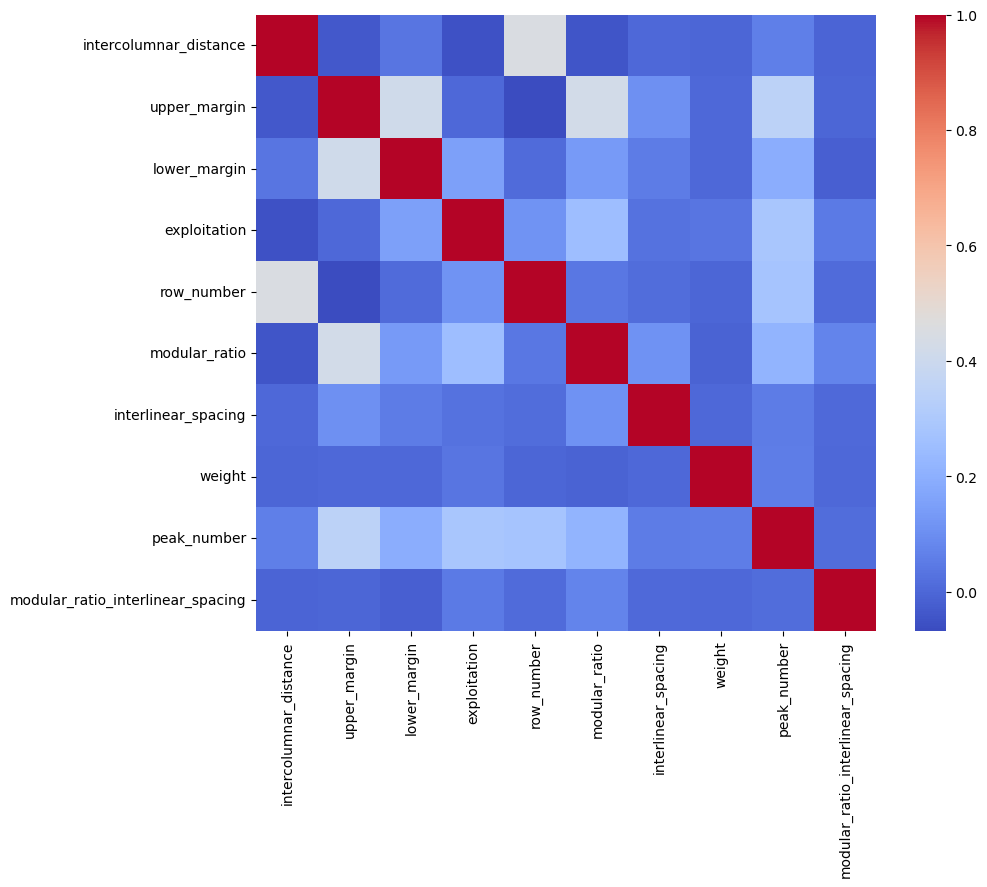

In [13]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

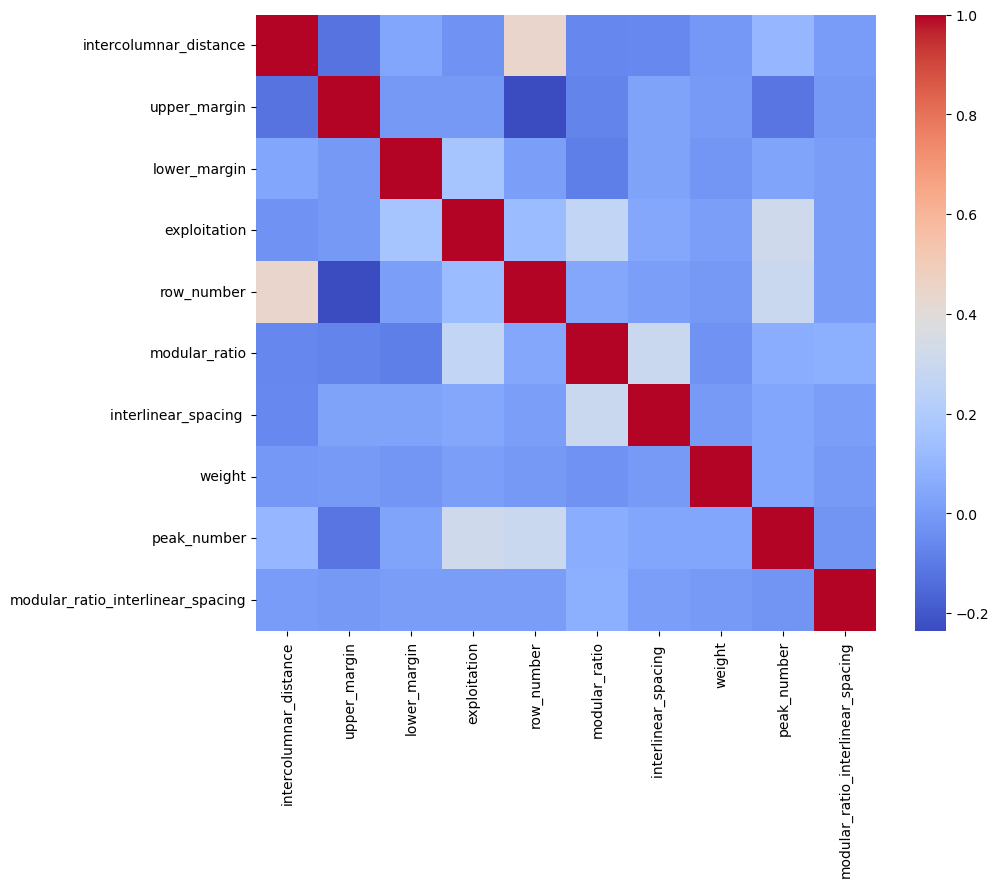

In [14]:
corr = test.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

<Axes: >

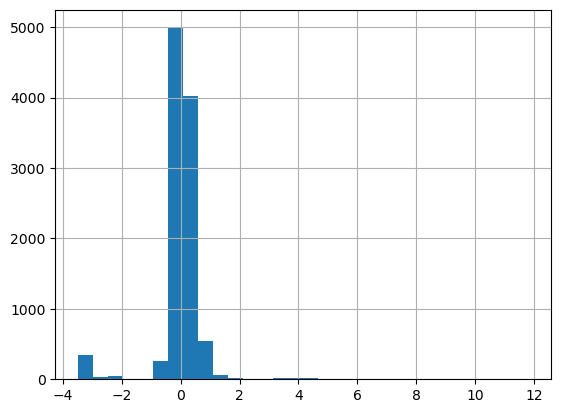

In [15]:
train['intercolumnar_distance'].describe()
train['intercolumnar_distance'].hist(bins=30)

<Axes: xlabel='upper_margin', ylabel='lower_margin'>

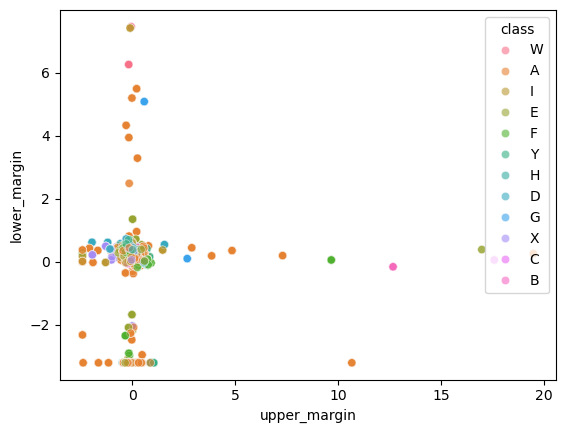

In [16]:
sns.scatterplot(x="upper_margin", y="lower_margin", hue="class", data=test, alpha=0.6)

<Axes: xlabel='class', ylabel='weight'>

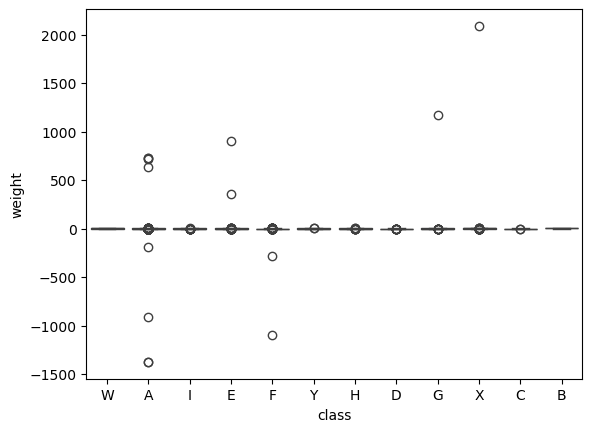

In [17]:
sns.boxplot(x="class", y="weight", data=test)

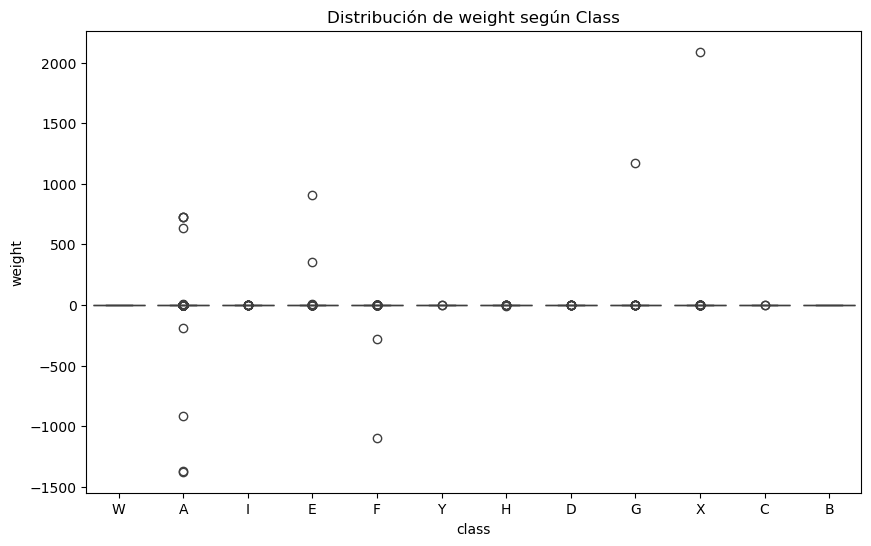

In [18]:

plt.figure(figsize=(10,6))
sns.boxplot(x="class", y="weight", data=test)
plt.title("Distribución de weight según Class")
plt.show()

In [19]:
train.groupby("class")["weight"].mean().sort_values()

class
F   -0.670786
C   -0.346044
D   -0.114703
H   -0.082314
G   -0.049023
E    0.061795
A    0.098151
W    0.236984
Y    0.306414
I    0.677448
B    0.894397
X    1.828419
Name: weight, dtype: float64

<Axes: xlabel='class', ylabel='upper_margin'>

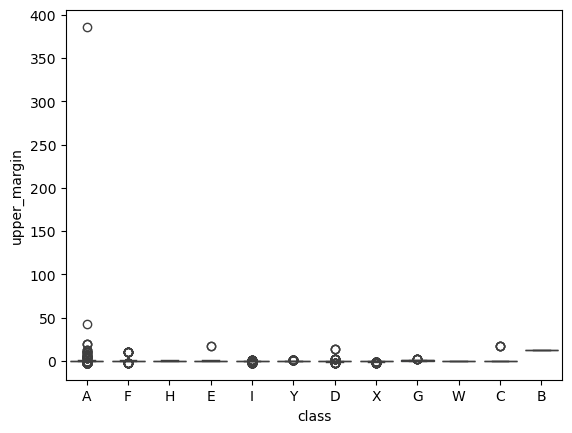

In [20]:
sns.boxplot(x="class", y="upper_margin", data=train)

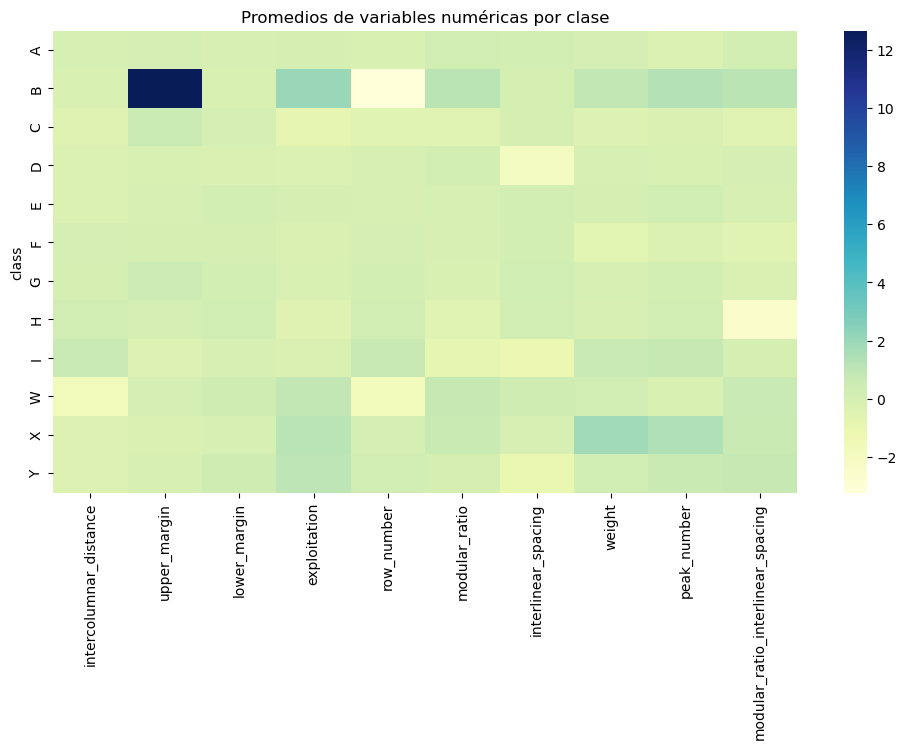

In [21]:
class_means = train.groupby("class").mean(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(class_means, cmap="YlGnBu", annot=False)
plt.title("Promedios de variables numéricas por clase")
plt.show()

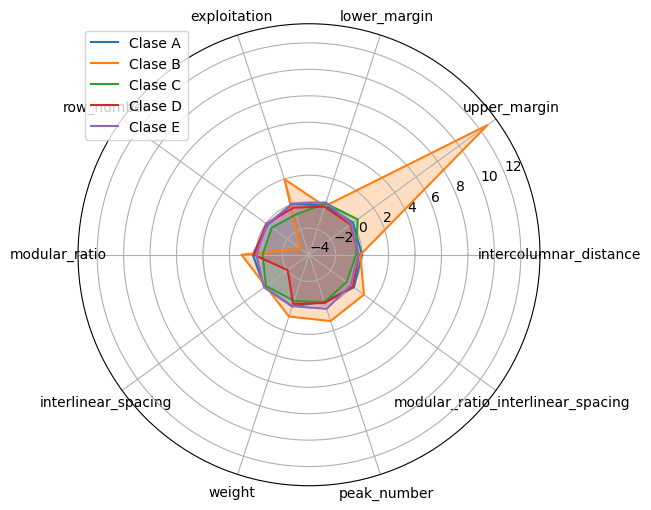

In [22]:
# Ejemplo comparando dos clases
clases = ["A","B","C","D","E"]
vars = class_means.columns
angles = np.linspace(0, 2*np.pi, len(vars), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for c in clases:
    valores = class_means.loc[c].values
    valores = np.concatenate((valores,[valores[0]]))  # cerrar círculo
    ax.plot(angles + [angles[0]], valores, label=f"Clase {c}")
    ax.fill(angles + [angles[0]], valores, alpha=0.25)
ax.set_xticks(angles)
ax.set_xticklabels(vars, rotation=20)
ax.legend()
plt.show()

In [23]:
class_means = train.groupby("class").mean(numeric_only=True)
print(class_means)

       intercolumnar_distance  upper_margin  lower_margin  exploitation  \
class                                                                     
A                   -0.011304      0.095912     -0.086789      0.012567   
B                   -0.128929     12.655362     -0.162690      1.993015   
C                   -0.464969      0.534202      0.063504     -0.815403   
D                   -0.254016     -0.132074     -0.201861     -0.265887   
E                   -0.282556     -0.052212      0.140906      0.055372   
F                    0.091038      0.027785      0.023566     -0.226916   
G                    0.045407      0.465713      0.183804     -0.170451   
H                    0.209159      0.121666      0.292207     -0.437065   
I                    0.629586     -0.314198     -0.099035     -0.215732   
W                   -1.614399      0.083119      0.348865      0.911447   
X                   -0.312384     -0.242643     -0.039688      1.177860   
Y                   -0.34

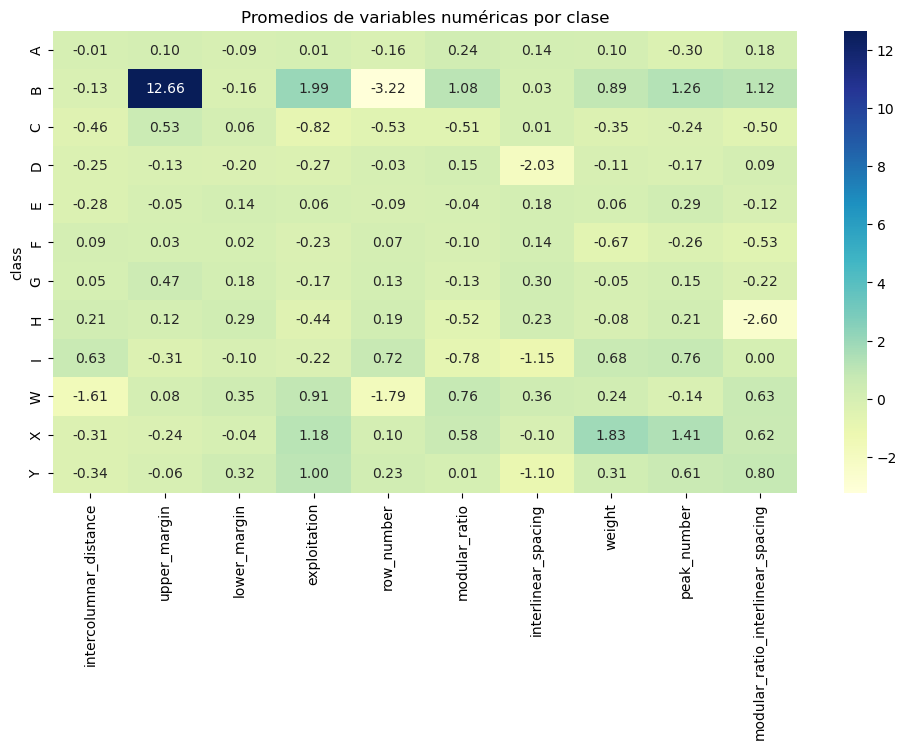

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(class_means, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Promedios de variables numéricas por clase")
plt.show()

In [31]:
# 2) Verificar esquema básico
print("train.shape:", train.shape, " test.shape:", test.shape)
print("train cols:", list(train.columns))
print("test  cols:", list(test.columns))

label_col = "class"

# 1) Normalizar nombres (espacios, etc.)
def clean_cols(df):
    df = df.copy()
    df.columns = [c.strip() for c in df.columns]
    return df

train = clean_cols(train)
test  = clean_cols(test)

# 2) Separar X, y
y_train = train[label_col]
X_train = train.drop(columns=[label_col]).copy()
y_test  = test[label_col]
X_test  = test.drop(columns=[label_col]).copy()

# 3) Verificar diferencias de columnas
miss_in_test = set(X_train.columns) - set(X_test.columns)
extra_in_test = set(X_test.columns) - set(X_train.columns)
print("Faltan en test:", miss_in_test)
print("Sobran en test:", extra_in_test)

# 4) Si no hay diferencias, reordenar columnas de test para que coincidan
X_test = X_test[X_train.columns]

# 5) Tipos numéricos
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test  = X_test.apply(pd.to_numeric,  errors="coerce")

# 6) Imputación (ajustar SOLO con train)
imp = SimpleImputer(strategy="mean")
X_train_imp = pd.DataFrame(imp.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imp  = pd.DataFrame(imp.transform(X_test),    columns=X_train.columns, index=X_test.index)

# 7) Escalado (ajustar SOLO con train)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imp), columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test_imp),      columns=X_train.columns, index=X_test.index)

train.shape: (10430, 11)  test.shape: (10437, 11)
train cols: ['intercolumnar_distance', 'upper_margin', 'lower_margin', 'exploitation', 'row_number', 'modular_ratio', 'interlinear_spacing', 'weight', 'peak_number', 'modular_ratio_interlinear_spacing', 'class']
test  cols: ['intercolumnar_distance', 'upper_margin', 'lower_margin', 'exploitation', 'row_number', 'modular_ratio', 'interlinear_spacing', 'weight', 'peak_number', 'modular_ratio_interlinear_spacing', 'class']
Faltan en test: set()
Sobran en test: set()


In [37]:
logreg = LogisticRegression(
    multi_class="multinomial", solver="lbfgs",
    class_weight="balanced", max_iter=2000, n_jobs=-1
)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

acc = round(accuracy_score(y_test, y_pred), 4)
f1m = round(f1_score(y_test, y_pred, average="macro"), 4)

print("Accuracy:", acc)
print("F1 macro:", f1m)
# Opcional:
print(classification_report(y_test, y_pred, digits=3))
print(confusion_matrix(y_test, y_pred))

/home/cristian/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.3723
F1 macro: 0.4
              precision    recall  f1-score   support

           A      0.721     0.309     0.433      4286
           B      1.000     1.000     1.000         5
           C      0.073     0.437     0.125       103
           D      0.118     0.241     0.158       353
           E      0.382     0.267     0.314      1095
           F      0.365     0.200     0.259      1962
           G      0.107     0.362     0.166       447
           H      0.217     0.508     0.304       520
           I      0.854     0.865     0.860       832
           W      0.070     0.911     0.131        45
           X      0.493     0.707     0.581       522
           Y      0.356     0.689     0.469       267

    accuracy                          0.372     10437
   macro avg      0.396     0.541     0.400     10437
weighted avg      0.528     0.372     0.399     10437

[[1326    0  256  338  190  545  800  272   49  274  175   61]
 [   0    5    0    0    0    0    0   

In [39]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
pred_rf = rf.predict(X_test_scaled)

print("RF Accuracy:", round(accuracy_score(y_test, pred_rf),4))
print("RF F1 macro:", round(f1_score(y_test, pred_rf, average="macro"),4))

RF Accuracy: 0.9952
RF F1 macro: 0.995


In [41]:
param_grid = {
    "C": [1, 3, 10],
    "gamma": ["scale", 0.1, 0.03]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, cv=cv, n_jobs=-1)
svm.fit(X_train_scaled, y_train)
pred_svm = svm.predict(X_test_scaled)

print("SVM best:", svm.best_params_)
print("SVM Accuracy:", round(accuracy_score(y_test, pred_svm),4))
print("SVM F1 macro:", round(f1_score(y_test, pred_svm, average="macro"),4))

SVM best: {'C': 10, 'gamma': 'scale'}
SVM Accuracy: 0.6911
SVM F1 macro: 0.7373


In [42]:
pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, pred_rf, digits=3))
print(confusion_matrix(y_test, pred_rf))

              precision    recall  f1-score   support

           A      0.994     0.998     0.996      4286
           B      1.000     1.000     1.000         5
           C      0.971     0.990     0.981       103
           D      1.000     0.997     0.999       353
           E      0.995     0.995     0.995      1095
           F      0.996     0.992     0.994      1962
           G      0.998     0.989     0.993       447
           H      0.998     0.992     0.995       520
           I      1.000     0.998     0.999       832
           W      1.000     1.000     1.000        45
           X      0.992     0.989     0.990       522
           Y      1.000     0.996     0.998       267

    accuracy                          0.995     10437
   macro avg      0.995     0.995     0.995     10437
weighted avg      0.995     0.995     0.995     10437

[[4277    0    0    0    0    7    1    1    0    0    0    0]
 [   0    5    0    0    0    0    0    0    0    0    0    0]
 [   1 

In [45]:
perm = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, n_jobs=-1, random_state=42)
imp = pd.Series(perm.importances_mean, index=X_train_scaled.columns).sort_values(ascending=False)
print(imp)

intercolumnar_distance               0.292364
upper_margin                         0.228581
lower_margin                         0.206324
row_number                           0.185503
exploitation                         0.166322
peak_number                          0.042733
interlinear_spacing                  0.002779
weight                               0.002520
modular_ratio                        0.000402
modular_ratio_interlinear_spacing   -0.000623
dtype: float64


In [46]:
rf_small = RandomForestClassifier(
    n_estimators=200, max_depth=12, class_weight="balanced_subsample",
    n_jobs=-1, random_state=42
).fit(X_train_scaled, y_train)

pred_small = rf_small.predict(X_test_scaled)
print("RF_small Accuracy:", round(accuracy_score(y_test, pred_small),4))
print("RF_small F1 macro:", round(f1_score(y_test, pred_small, average='macro'),4))

RF_small Accuracy: 0.8835
RF_small F1 macro: 0.9241


In [47]:
feat_cols = [c for c in train.columns if c != "class"]

# normalizar tipos
A = train[feat_cols + ["class"]].copy().apply(pd.to_numeric, errors="ignore")
B = test[feat_cols + ["class"]].copy().apply(pd.to_numeric, errors="ignore")

# filas idénticas (todas las columnas, incluida Class)
overlap_all = pd.merge(A.drop_duplicates(), B.drop_duplicates(), how="inner")
print("Filas idénticas con etiqueta en ambos sets:", overlap_all.shape[0])

# filas idénticas SOLO en features
overlap_X = pd.merge(
    A[feat_cols].drop_duplicates(),
    B[feat_cols].drop_duplicates(),
    how="inner"
)
print("Filas idénticas solo en features:", overlap_X.shape[0])

Filas idénticas con etiqueta en ambos sets: 0
Filas idénticas solo en features: 0


/tmp/ipykernel_74766/1412789178.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  A = train[feat_cols + ["class"]].copy().apply(pd.to_numeric, errors="ignore")
/tmp/ipykernel_74766/1412789178.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  B = test[feat_cols + ["class"]].copy().apply(pd.to_numeric, errors="ignore")
